In [3]:
# import libraries
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# For reproducibility
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1] range and reshape
x_train = x_train.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Further split training data into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

print(f'Training samples: {x_train.shape[0]}')
print(f'Validation samples: {x_val.shape[0]}')
print(f'Test samples: {x_test.shape[0]}')

Training samples: 48000
Validation samples: 12000
Test samples: 10000


In [5]:
def create_baseline_model(input_shape=(784,), num_classes=10):
    model = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=input_shape),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


def create_dropout_model(input_shape=(784,), num_classes=10, dropout_rate=0.5):
    model = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=input_shape),
        layers.Dropout(dropout_rate),
        layers.Dense(256, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


def create_l2_model(input_shape=(784,), num_classes=10, l2_factor=1e-4):
    model = models.Sequential([
        layers.Dense(512, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_factor),
                     input_shape=input_shape),
        layers.Dense(256, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_factor)),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


def create_batch_norm_model(input_shape=(784,), num_classes=10):
    model = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


def compile_and_train(model, x_train, y_train, x_val, y_val, 
                     epochs=20, batch_size=128):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_val, y_val),
        verbose=2
    )
    return history

In [6]:

# Create models
baseline_model = create_baseline_model()
dropout_model = create_dropout_model()
l2_model = create_l2_model()
batch_norm_model = create_batch_norm_model()

# Dictionary to hold models and their histories
models_dict = {
    'Baseline': baseline_model,
    'Dropout': dropout_model,
    'L2 Regularization': l2_model,
    'Batch Normalization': batch_norm_model
}

histories = {}

# Train each model
for model_name, model in models_dict.items():
    print(f'\nTraining {model_name} Model')
    history = compile_and_train(model, x_train, y_train, x_val, y_val)
    histories[model_name] = history


Training Baseline Model
Epoch 1/20


/opt/homebrew/Caskroom/miniforge/base/envs/py312/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 - 2s - 5ms/step - accuracy: 0.9266 - loss: 0.2572 - val_accuracy: 0.9636 - val_loss: 0.1230
Epoch 2/20
375/375 - 1s - 4ms/step - accuracy: 0.9723 - loss: 0.0929 - val_accuracy: 0.9707 - val_loss: 0.0941
Epoch 3/20
375/375 - 1s - 4ms/step - accuracy: 0.9823 - loss: 0.0576 - val_accuracy: 0.9726 - val_loss: 0.0941
Epoch 4/20
375/375 - 2s - 4ms/step - accuracy: 0.9893 - loss: 0.0359 - val_accuracy: 0.9737 - val_loss: 0.0979
Epoch 5/20
375/375 - 2s - 4ms/step - accuracy: 0.9919 - loss: 0.0276 - val_accuracy: 0.9742 - val_loss: 0.1003
Epoch 6/20
375/375 - 2s - 4ms/step - accuracy: 0.9929 - loss: 0.0227 - val_accuracy: 0.9725 - val_loss: 0.1119
Epoch 7/20
375/375 - 2s - 5ms/step - accuracy: 0.9944 - loss: 0.0180 - val_accuracy: 0.9728 - val_loss: 0.1127
Epoch 8/20
375/375 - 2s - 5ms/step - accuracy: 0.9946 - loss: 0.0164 - val_accuracy: 0.9739 - val_loss: 0.1110
Epoch 9/20
375/375 - 2s - 5ms/step - accuracy: 0.9948 - loss: 0.0159 - val_accuracy: 0.9750 - val_loss: 0.1114
Epoch 10/20


In [7]:
# Evaluation models
test_results = {}

for model_name, model in models_dict.items():
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    test_results[model_name] = {'loss': test_loss, 'accuracy': test_acc}
    print(f'{model_name} Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}')

Baseline Test Accuracy: 0.9787, Test Loss: 0.1086
Dropout Test Accuracy: 0.9796, Test Loss: 0.0730
L2 Regularization Test Accuracy: 0.9774, Test Loss: 0.1226
Batch Normalization Test Accuracy: 0.9822, Test Loss: 0.0882


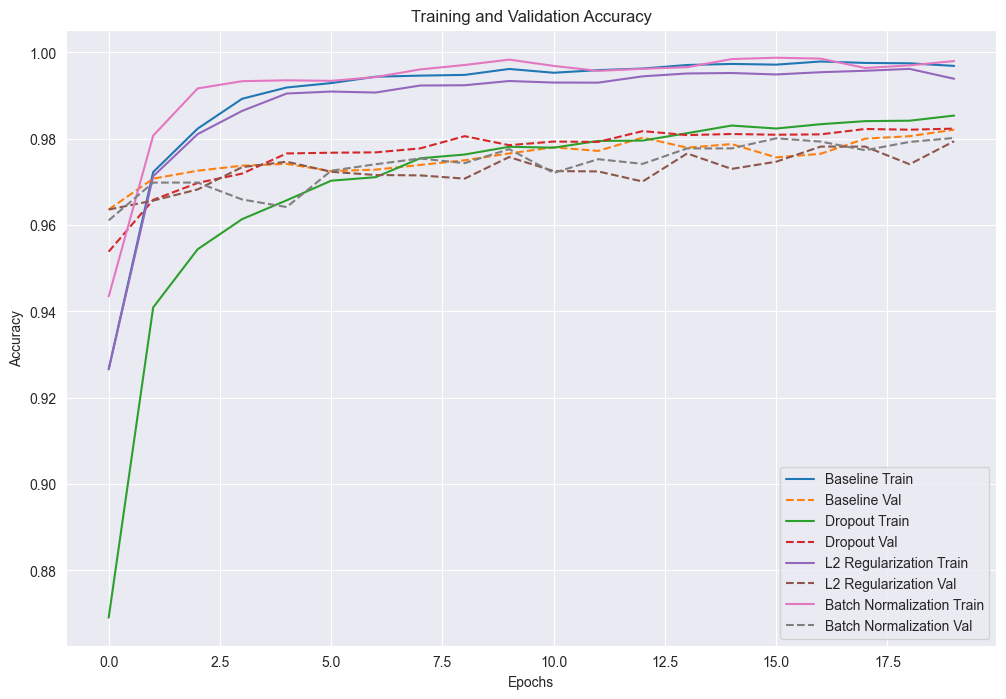

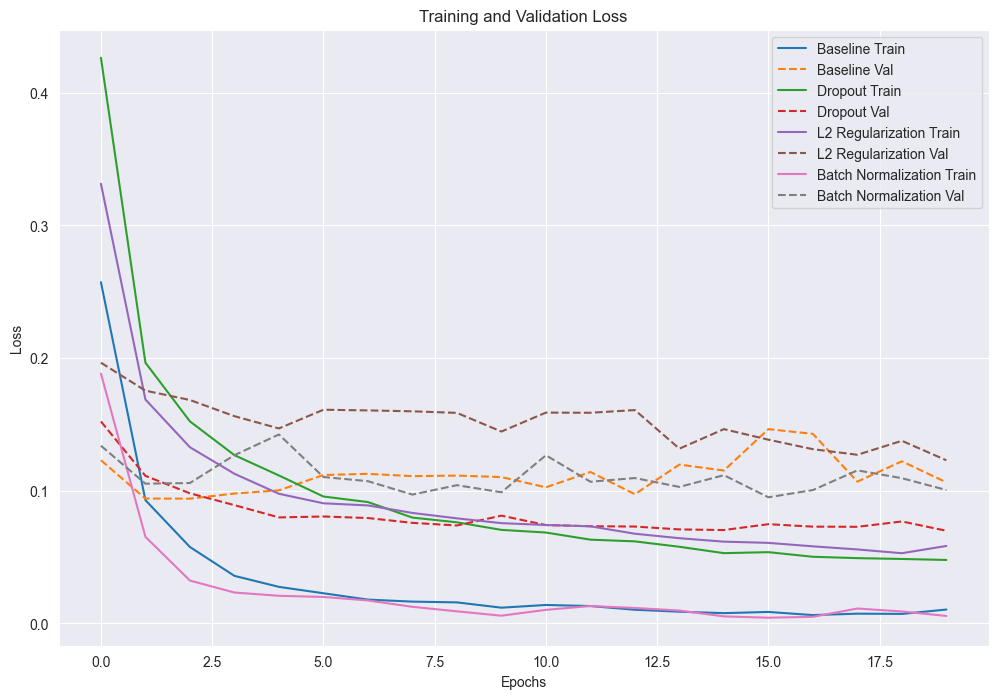

In [8]:
# Plot training history
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(12, 8))
    
    for name, history in histories.items():
        plt.plot(history.history[key], label=f'{name} Train')
        plt.plot(history.history[f'val_{key}'], linestyle='--', label=f'{name} Val')
    
    plt.title(f'Training and Validation {key.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(key.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Accuracy
plot_history(histories, key='accuracy')

# Plot Loss
plot_history(histories, key='loss')